# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Linux_20/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
print(env.brain_names)

env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

['ReacherBrain']
Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)

    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    
    
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.09249999793246388


When finished, you can close the environment.

In [ ]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
import os 
print(os.getcwd())

from ddpg_agent import Agent
from collections import deque
import numpy as np
#FOR MULTI AGENT 


# Initialize Feed-forward DNNs for Actor and Critic models. 
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

# Set the number of episodes to run the simulation
episodes = 150
learn_iters = 10

scores = []                        # list containing scores from each episode
scores_window = deque(maxlen=100)  # last 100 scores

for episode in range(episodes): 
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations
    ep_scores = np.zeros(num_agents)                          # initialize the score (for each agent)

    while True:
        #choose an action
        actions = []
        for state in states:
            actions.append(agent.act(state))         # select an action (for each agent)
            
        actions = np.asarray(actions)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]          # send all actions to tne environment
        
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        
        for i in range(next_states.shape[0]):  
            agent.step(states[i], actions[i], rewards[i], next_states[i], dones[i])
            
        for i in range(learn_iters):
            agent.step_learn()
            
        ep_scores += env_info.rewards                       # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        
        if np.any(dones):                                    # exit loop if episode finished
            break
            
    scores_window.append(np.mean(ep_scores))       # save most recent score
    scores.append(np.mean(ep_scores))              # save most recent score
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode+1, np.mean(ep_scores)), end="")

    if episode+1 % 20 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode+1, np.mean(scores_window)))

        

/home/rm/Documents/deep-reinforcement-learning/p2_continuous-control
starting agent


/home/rm/Documents/deep-reinforcement-learning/p2_continuous-control/ddpg_agent.py:118: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 150	Average Score: 38.24

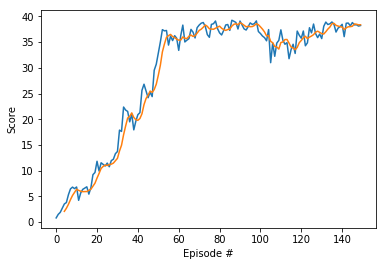

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
rolling_mean = pd.Series(scores).rolling(5).mean()
plt.plot(rolling_mean);
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [8]:
import torch
#save ur trained model
torch.save(agent.actor_local.state_dict(), './actor_checkpoint.pth')
torch.save(agent.critic_local.state_dict(), './critic_checkpoint.pth')


In [9]:

#to load
agent.actor_local.load_state_dict(torch.load('./actor_checkpoint.pth'))
agent.critic_local.load_state_dict(torch.load('./critic_checkpoint.pth'))

In [13]:
#try out trained model
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations
ep_scores = np.zeros(num_agents)                          # initialize the score (for each agent)

while True:
    #choose an action
    actions = []
    for state in states:
        actions.append(agent.act(state))         # select an action (for each agent)

    actions = np.asarray(actions)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]          # send all actions to tne environment

    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished


    ep_scores += env_info.rewards                       # update the score (for each agent)
    states = next_states                               # roll over states to next time step

    if np.any(dones):                                    # exit loop if episode finished
        break

print('\rEpisode {}\tAverage Score: {:.2f}'.format(1, np.mean(ep_scores)), end="")


Episode 1	Average Score: 39.09

In [14]:
env.close()

## Report 

Here, we attempt to solve the 20 agents reacher game (version 2). This version is more stable because more agents are exploring the states in parallel. The learning algorithm used is DDPG agent because we want a continous action value. We separated updating replay buffer step and learning step. Here we learn 10 steps for every 20 updates to introduce more stability. Noise is not added to the action steps because it makes it much harder to solve the environment, and partly because we have used parallel agents to explore the state-action space.

This algorithm uses two function approximators: the actor and the critic. Here are we use the same core architecture for both networks namely, 3 fully connected layers with 256 units in fc1 and 256 units in fc2. Input for the actor network is state vector, and outputs deterministic action value. On the other hand critic network inputs are state-action values and outputs expected Q value function. We clip the gradient of critic at learning step to avoid unstable gradients. 

Below are the hyperparameters used:

* BUFFER_SIZE = int(1e6)  # replay buffer size
* BATCH_SIZE = 128        # minibatch size
* GAMMA = 0.99            # discount factor
* TAU = 1e-3              # for soft update of target parameters
* LR_ACTOR = 1e-4         # learning rate of the actor 
* LR_CRITIC = 3e-4        # learning rate of the critic
* WEIGHT_DECAY = 0.0001   # L2 weight decay
* FC1 = 256               # number of nodes in first hidden layer
* FC2 = 256               # number of nodes in second hidden layer

Using this configurations, the environment can be solved in around 50 episodes. Also thanks to the stability techniques, the agent does not crash. 

To improve performance, we can use prioritized replay buffer, deeper networks, or other continous control agents such as TRPO, TNPG, PPO, or D4PG.